### **Abstract**

Este dataset proveido por Oracle es sobre detección de fraude en seguros de vehículos. El fraude de seguros de vehículos implica realizar denuncias falsas o exageradas para cobrar la suma asegurada según la cobertura que tengan contratada.

Con la información que las compañías de seguro solicitan durante el periodo de subscripción del seguro, se busca poder predecir quienes pueden presentar mayores probabilidades de cometer fraude como así entender cuáles son características comunes que presentan dichos individuos.

###**Contexto comercial:** 
Las compañías de seguros se basan en la ley de los grandes número para evaluar el valor y la frecuencia de las reclamaciones futuras que pagan a los asegurados. Cuando funciona a la perfección, las compañías de seguros tienen un negocio estable, los consumidores pagan una prima justa y precisa, y todo el sistema financiero evita serios trastornos. Sin embargo, este equilibrio se pierde si no se identifica los reclamos fraudulentos.


###**Problema comercial:** 
Existen caracteristicas comunes que se puedan identificar con la population que cometio fraude? 

###**Contexto analítico:** 

Oracle ha proporcionado 15420 datos sobre todos los reclamos realizado de una compañia de seguros de quienes están cubiertos durante el plazo de la poliza para vehículos. 
El database proporciona la siguiente información:

00) Month: mes en el que ocurrió el accidente

01) WeekOfMonth: semana en la que ocurrió el accidente

02) DayOfWeek: Día de la semana en que ocurrió el accidente

03) Make: Marca del vehículo

04) AccidentArea: Si el accidente fue en un área rural o urbana

05) DayOfWeekClaimed: Día de la semana en la que se hizo la denuncia

06) MonthClaimed: Mes en el que se hizo la denuncia

07) WeekOfMonthClaimed: Número de semana del mes en la que se hizo la denuncia 

08) Sex: Género de la persona que realiza la denuncia

09) MaritalStatus: Estado cívil de la persona que hace la denuncia

10) Age: Edad de la persona que hace la denuncia

11) Fault: Si el culpable fue el dueño del seguro u otro involucrado 

12) PolicyType: Combinación de tipo de auto y de tipo de póliza: Liability (contra terceros), Collision (Incluye daños al vehículo del propietario), All Perils (contra todo riesgo)

13) VehicleCatergory: Clasificación de tipo de auto

14) VehiclePrice: Precio del vehículo

15) FraudFound_P: Si el incidente fue fraudulento o no, columna a predecir

16) PolicyNumber: Número único de accidente, coincide con el número de filas del dataset

17) RepNumber: Numeración entre 1 y 16

18) Deductible: Costo del seguro

19) DriverRating: Calificación del piloto, puede ser data ordinal

20) Days_Policy_Accident: Rango adquisición del seguro y suceso del accidente

21) Days_Policy_Claim: Rango entre adquisición del seguro y denuncia del accidente

22) PastNumberOfClaims: Cantidad de denuncias anteriores realizadas por el dueño del vehículo

23) AgeOfVehicle: Edad del vehículo

24) AgeOfPolicyHolder: Edad del dueño del seguro

25) PoliceReportFiled: Si fue denunciado a la policía

26) WitnessPresent: Si hubo un testigo presente

27) AgentType: Internos son cuando el fraude es realizado por personas trabajando en la empresa de seguros. Externos son los fraudes en los que el seguro es engañado por personas independientes.

28) NumberOfSuppliments: Son daños al vehículo no registrados a la hora de la denuncia, daños extras que no se ven por el exterior, normalmente roturas en componentes internos como suspensión, chasis, etc

29) AddressChange_Claim: Si el dueño del seguro se mudó después de denunciar un accidente y cuanto tiempo después

30) NumberOfCars: Número de autos involucrados en el accidente

31) Year: Año en el que ocurrió el accidente

32) BasePolicy: Tipo de seguro

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from google.colab import drive
import os
drive.mount('/content/gdrive')
%cd '/content/gdrive/My Drive'
df= pd.read_csv('fraud_oracle.csv',sep=';',encoding= 'unicode_escape')
df.head()



Mounted at /content/gdrive
/content/gdrive/My Drive


,ï»¿Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,15420.0,2.788586,1.287585,1.0,2.00,3.0,4.00,5.0
WeekOfMonthClaimed,15420.0,2.693969,1.259115,1.0,2.00,3.0,4.00,5.0
Age,15420.0,39.855707,13.492377,0.0,31.00,38.0,48.00,80.0
FraudFound_P,15420.0,0.059857,0.237230,0.0,0.00,0.0,0.00,1.0
PolicyNumber,15420.0,7710.500000,4451.514911,1.0,3855.75,7710.5,11565.25,15420.0
RepNumber,15420.0,8.483268,4.599948,1.0,5.00,8.0,12.00,16.0
Deductible,15420.0,407.704280,43.950998,300.0,400.00,400.0,400.00,700.0
DriverRating,15420.0,2.487808,1.119453,1.0,1.00,2.0,3.00,4.0
Year,15420.0,1994.866472,0.803313,1994.0,1994.00,1995.0,1996.00,1996.0


In [ ]:
#Filtro el dataset para obtener solo la información de los reclamos fraudulentos, es decir, FraudFound_P=1

df_fraud = df.loc[(df['FraudFound_P'] == 1)]
df_fraud.head(5)

,ï»¿Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
28,Jul,1,Saturday,Honda,Urban,Tuesday,Sep,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils
52,Jul,3,Sunday,Honda,Rural,Wednesday,Jan,4,Male,Married,...,4 years,26 to 30,No,No,External,3 to 5,no change,1 vehicle,1994,Collision
53,Jul,4,Saturday,Honda,Urban,Wednesday,Aug,2,Male,Married,...,more than 7,41 to 50,No,No,External,3 to 5,no change,1 vehicle,1994,Collision
94,Nov,2,Thursday,Honda,Urban,Friday,Jan,3,Male,Single,...,7 years,31 to 35,No,No,External,3 to 5,no change,1 vehicle,1994,Collision
96,Nov,2,Friday,Toyota,Urban,Tuesday,Jan,1,Male,Married,...,7 years,36 to 40,No,No,External,none,no change,1 vehicle,1994,Collision


In [ ]:
df_fraud.columns

Index(['ï»¿Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [ ]:
#Como solo me interesa analizar variables específicas para poder identificar un perfil con caracteristicas comunes de quienes cometen fraude, remuevo variables redundantes.
df_fraud_cleaned = df_fraud.copy().drop(['ï»¿Month','WeekOfMonth','DayOfWeek','DayOfWeekClaimed', 'MonthClaimed', 'Age','PolicyType','VehiclePrice', 'WeekOfMonthClaimed','PolicyNumber', 'RepNumber','Deductible','DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim','AccidentArea','Year','PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments'], axis=1)

In [ ]:
df_fraud_cleaned.shape

(923, 12)

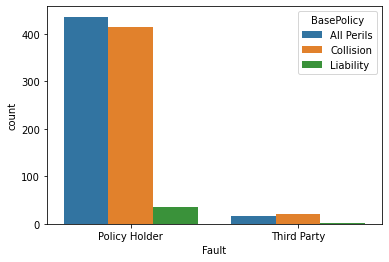

In [ ]:
sns.countplot(x='Fault', hue='BasePolicy', data=df_fraud_cleaned)

Este barplot muestra que se contrató una proporción alta y casi identica entre seguros con cobertura All perils (contra todo riesgo menos excepciones indicadas en la póliza) y Collision (cubren sólo daños al vehículo del propietario en caso de que accidente ocurra contra otro automóvil u objeto). 
La cantidad de cobertura Liability (responsabilidad civil contra terceros) fue contratada en menor proporción.

De este mismo gráfico se podría derivar que sólo el 2% de los 923 casos de fraude (20 casos aproximadamente) conspiraron con terceros para cobrar por daños o lesiones a terceros con la cobertura de liability y en el 98% de los casos restantes, pudieron haber causado el accidente contra un objeto y no otro vehiculo o causando lesiones a terceros dado que la cobertura de all perils y collision no cubriria dichos montos.

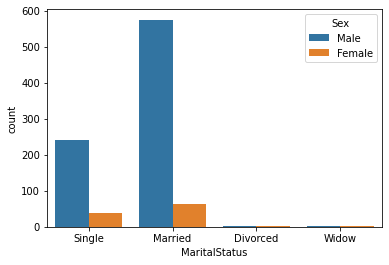

In [ ]:
sns.countplot(x='MaritalStatus', hue='Sex', data=df_fraud_cleaned)

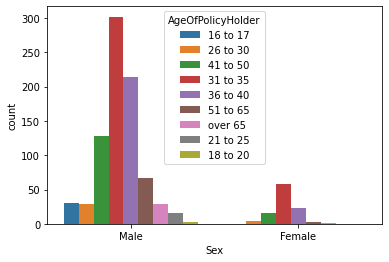

In [ ]:
sns.countplot(x='Sex', hue='AgeOfPolicyHolder', data=df_fraud_cleaned)

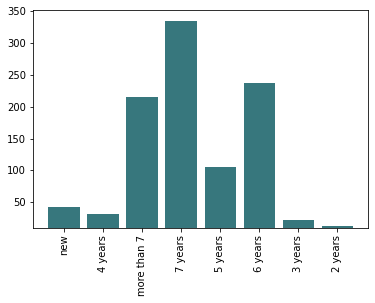

In [ ]:
from collections import Counter

PastNumberOfClaims_count = df_fraud_cleaned['AgeOfVehicle']

freqs = Counter(PastNumberOfClaims_count)

xvals = range(len(freqs.values()))
plt.bar(xvals, freqs.values() , color='#37777D', width=0.8, bottom= 10)
plt.xticks(xvals, freqs.keys(), rotation='vertical')
plt.show() 

Podriamos reducir nuestro perfil a hombres entre 31-50 (ordenados por orden de prioridad: rangos 31-35 años, 36-40 y 41-50) años con estado marital casado y soltero con vehículo con mínimo de 5 años de vida.

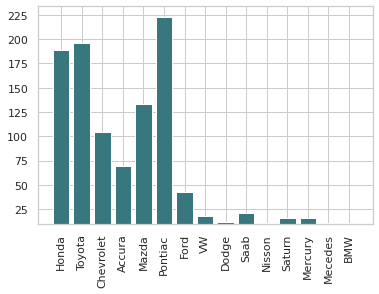

In [ ]:
from collections import Counter

Make_count = df_fraud_cleaned['Make']

freqs = Counter(Make_count)

xvals = range(len(freqs.values()))
plt.bar(xvals, freqs.values() , color='#37777D', width=0.8, bottom= 10)
plt.xticks(xvals, freqs.keys(), rotation='vertical')
plt.show() 

En conclusión, una primera hipotesis para corroborar con aprendizaje no supervizado podría ser: 
-Hombres 

-Entre 31-50 años

-Estado marital casado o soltero

-Vehículo con mínimo de 5 años de antiguedad

-Marca: Pontiac, Toyota, Honda, Mazda, Chevrolet